 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path("Resources/whale_returns.csv")
whale_returns_csv = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_csv.dropna(inplace=True)
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_path = Path("Resources/algo_returns.csv")
algo_returns_csv = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_csv.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [6]:
# Count nulls
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
algo_returns_csv.dropna(inplace=True)
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [8]:
algo_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_path = Path("Resources/sp500_history.csv")
sp500_history_csv = pd.read_csv(sp500_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_csv.sort_index(ascending = True, inplace = True)
sp500_history_csv.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_history_csv.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history_csv['Close'] = sp500_history_csv['Close'].str.replace('$','')

In [12]:
sp500_history_csv['Close'] = sp500_history_csv['Close'].astype('float')

In [13]:
sp500_history_csv.dtypes

Close    float64
dtype: object

In [14]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_csv.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [15]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [16]:
# Rename Columns
sp500_daily_returns.columns = ["SP500"]
sp500_daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Concatenate all DataFrames into a single DataFrame
all_daily_returns = pd.concat([whale_returns_csv, algo_returns_csv, sp500_daily_returns], axis="columns", join="inner")
all_daily_returns.columns = all_daily_returns.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
all_daily_returns.dropna(inplace=True)
all_daily_returns.head()

,soros_fund_management_llc,paulson_&_co.inc.,tiger_global_management_llc,berkshire_hathaway_inc,algo_1,algo_2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis


## Performance

Text(0, 0.5, 'Daily Returns')

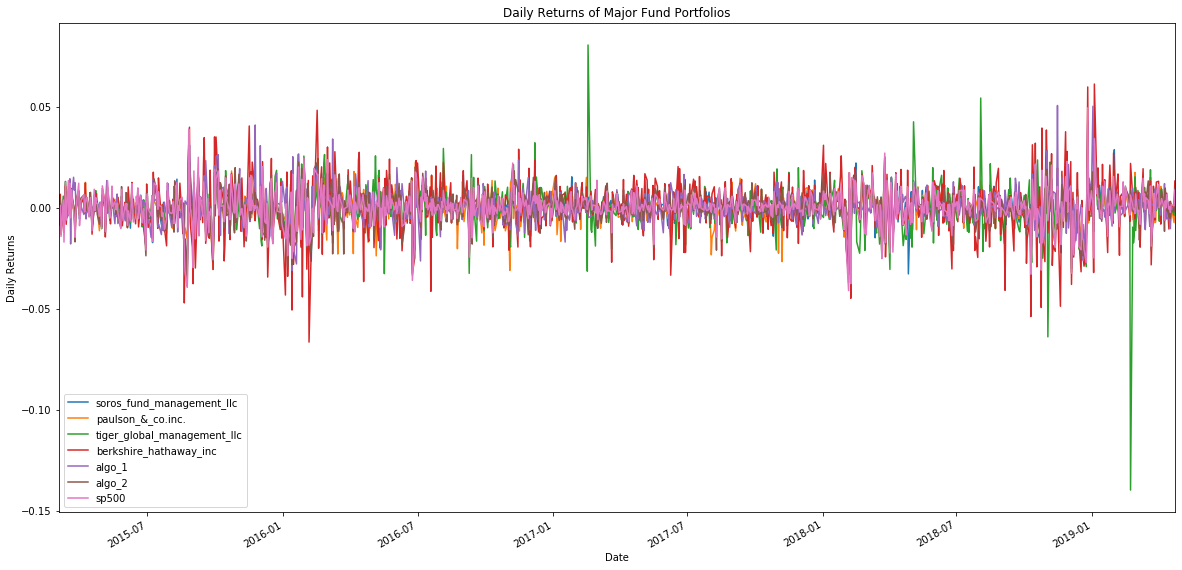

In [18]:
# Plot daily returns
daily_returns_obj = all_daily_returns.plot(figsize=(20, 10), title='Daily Returns of Major Fund Portfolios')
daily_returns_obj.set_ylabel("Daily Returns")

Text(0, 0.5, 'Cumulative Returns')

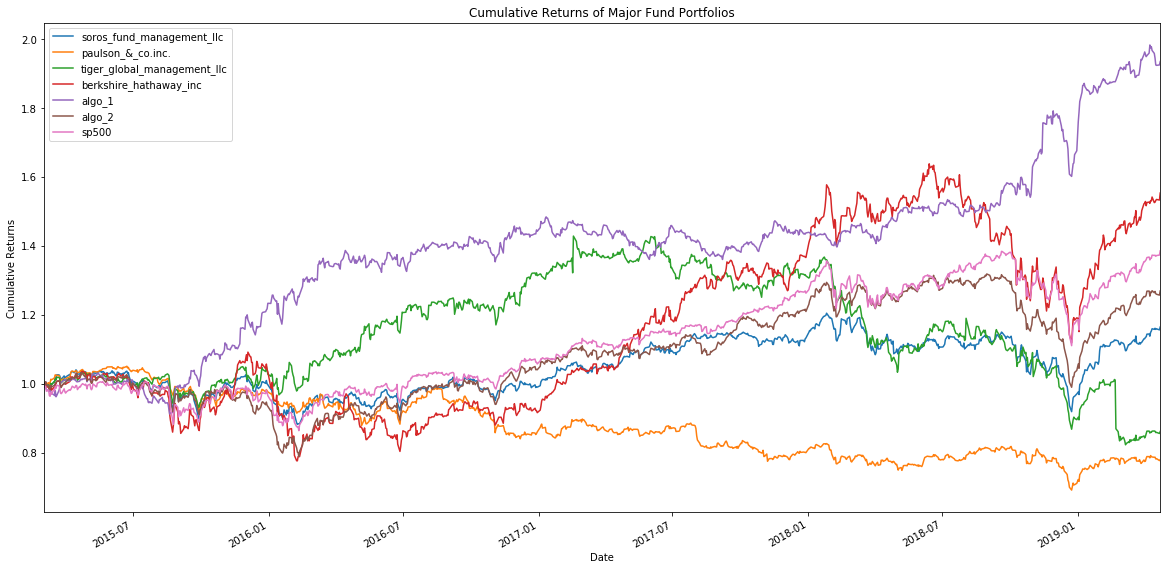

In [19]:
# Plot cumulative returns
cumulative_returns = (1 + all_daily_returns).cumprod() 
cumulative_plot_obj = cumulative_returns.plot(figsize=(20, 10), title='Cumulative Returns of Major Fund Portfolios')
cumulative_plot_obj.set_ylabel("Cumulative Returns")

Based on the cumulative return data and the visualization, Algo-1 (purple) has out-performed the S&P500 for the past three and a half years, whereas Berkshire Hathaway (red) has outperformed the S&P500 (pink) for the last two years. Tiger Global Management (green) outperformed the market from 2016 to 2018 and hasn’t recovered since. None of the other fund portfolios have outperformed the market in the past four years.

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

Text(0, 0.5, 'Daily Returns')

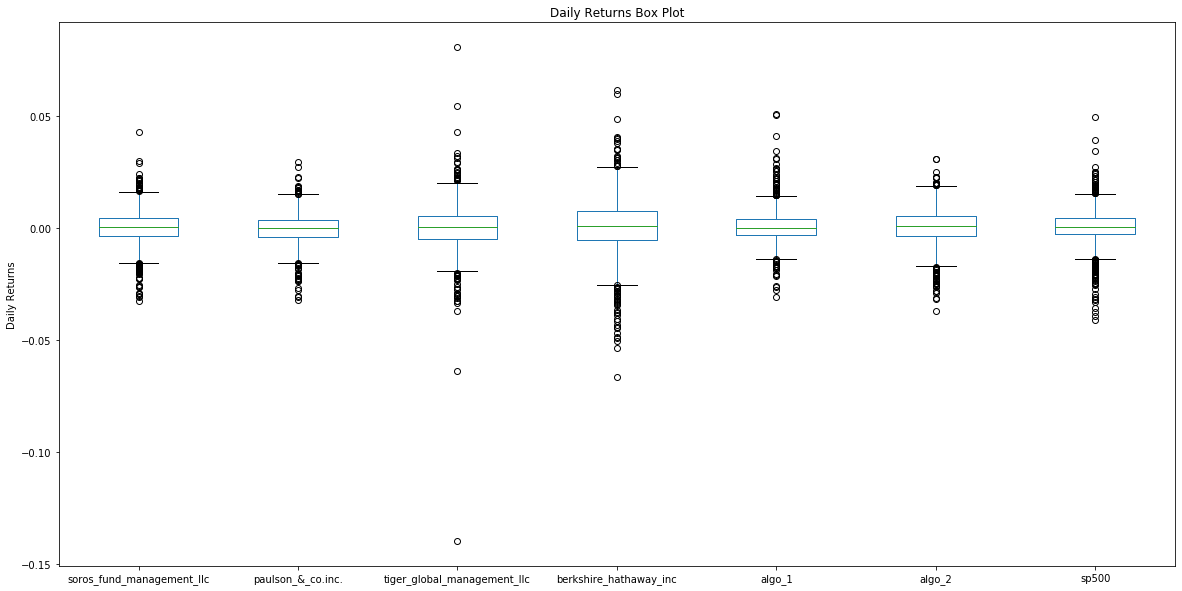

In [20]:
# Box plot to visually show risk
box_plt_obj = all_daily_returns.plot.box(figsize=(20, 10), title='Daily Returns Box Plot')
box_plt_obj.set_ylabel("Daily Returns")

<br>
<br>
<br>

**Based on the box plot visualization, Tiger Global Management LLC has the largest spread, and therefore the most volatile. Paulson & Co was the least volatile.**


<br>
<br>
<br>

In [21]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio.
all_std_deviations = all_daily_returns.std()
all_std_deviations.sort_values()

paulson_&_co.inc.              0.007023
algo_1                         0.007620
soros_fund_management_llc      0.007895
algo_2                         0.008342
sp500                          0.008554
tiger_global_management_llc    0.010894
berkshire_hathaway_inc         0.012919
dtype: float64

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_deviations = all_std_deviations * np.sqrt(252)
annualized_std_deviations.sort_values()

paulson_&_co.inc.              0.111488
algo_1                         0.120967
soros_fund_management_llc      0.125335
algo_2                         0.132430
sp500                          0.135786
tiger_global_management_llc    0.172936
berkshire_hathaway_inc         0.205077
dtype: float64

<br>
<br>
<br>

**Based on the annualized standard deviations data, Berkshire Hathaway and Tiger Global Management LLC have a higher standard deviation; therefore, are riskier investments than the S&P500.**

<br>
<br>
<br>

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21 day window
2. Calculate the correlation between each Portfolio to determine which portfolios may mimick the S&P 500

Text(0, 0.5, 'Standard Deviation')

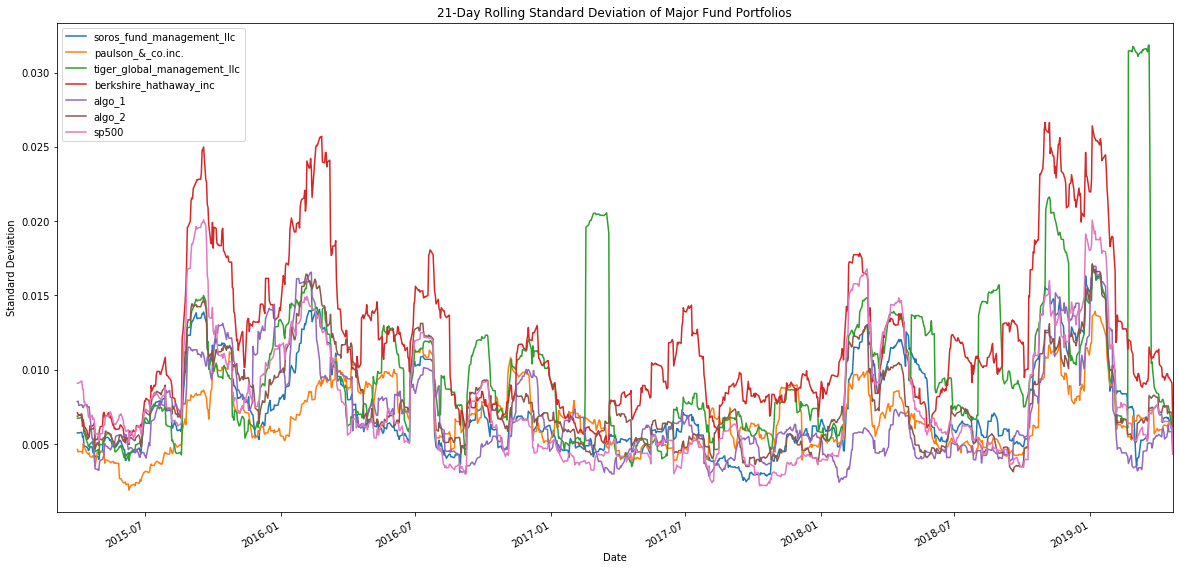

In [23]:
# Calculate and plot the rolling standard deviation for the S&P 500 using a 21 day window
rolling_21_std_obj = all_daily_returns.rolling(window=21).std().plot(figsize=(20, 10), title='21-Day Rolling Standard Deviation of Major Fund Portfolios')
rolling_21_std_obj.set_ylabel('Standard Deviation')

<br>
<br>
<br>

**Rolling metrics show that the risk of each portfolio increases at the same time as the risk of the S&P500 increases. Berkshire Hathaway and Tiger Global seem to consistently have a higher risk pattern than the market and all the other portfolios. Tiger Global will sporadically increase above all during brief periods throughout the year; however, Berkshire Hathaway is consistently showing higher risk patterns over the past four years.**

<br>
<br>
<br>

In [24]:
# Correlation between each Portfolio
correlation = all_daily_returns.corr(method='pearson')
correlation


,soros_fund_management_llc,paulson_&_co.inc.,tiger_global_management_llc,berkshire_hathaway_inc,algo_1,algo_2,sp500
soros_fund_management_llc,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
paulson_&_co.inc.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
tiger_global_management_llc,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
berkshire_hathaway_inc,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
algo_1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
algo_2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<br>
<br>
<br>

**Algo 2 portfolio's daily return patterns are the most correlated to the S&P500 than the other portfolios because its correlation benchmark is closest to 1. Soros Fund Management LLC is close behind by ~0.02 correlation value, making it the second most correlated to the S&P500.**

<br>
<br>
<br>

### Exponentially Weighted Average 

This is an alternative way to calculate the rolling window. This is like a moving window average, but it assigns greater importance to more recent observations.

Text(0, 0.5, 'EWM')

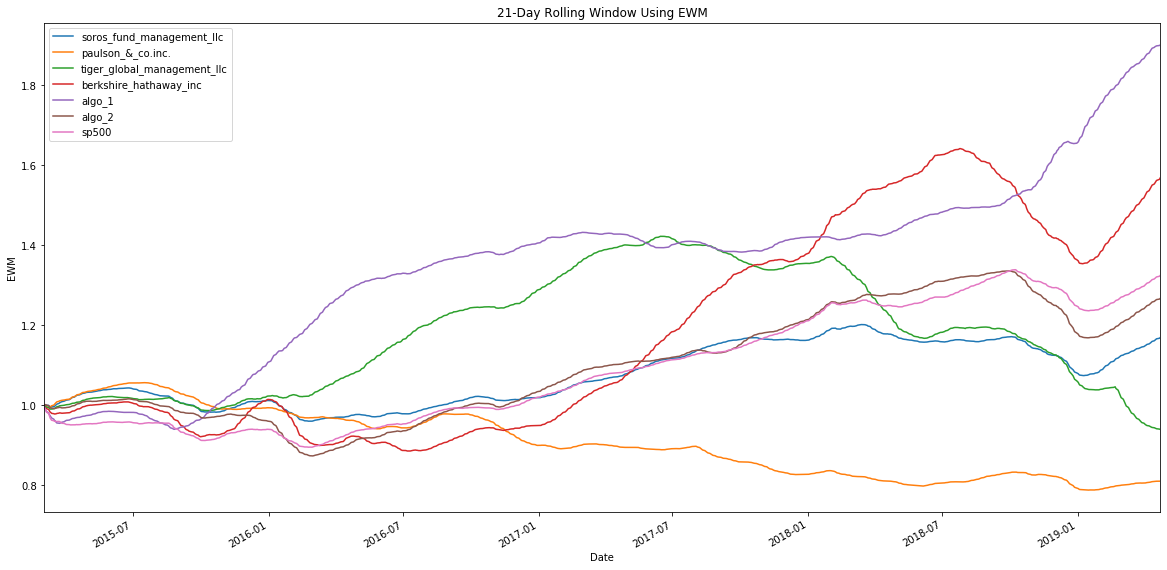

In [25]:
all_ewm = all_daily_returns.ewm(halflife=21).mean()
all_ewm_obj = (1+all_ewm).cumprod().plot(figsize=(20,10), title="21-Day Rolling Window Using EWM")
all_ewm_obj.set_ylabel('EWM')

---

## Risk-Return Profile
To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [26]:
# Annualzied Sharpe Ratios
sharpe_ratios = (all_daily_returns.mean() * 252) / (all_daily_returns.std() * np.sqrt(252))  # annual average returns / annual average standard deviations
sharpe_ratios.sort_values()

paulson_&_co.inc.             -0.483570
tiger_global_management_llc   -0.121060
soros_fund_management_llc      0.356417
algo_2                         0.501364
berkshire_hathaway_inc         0.621810
sp500                          0.648267
algo_1                         1.378648
dtype: float64

Text(0, 0.5, 'Sharpe Ratios')

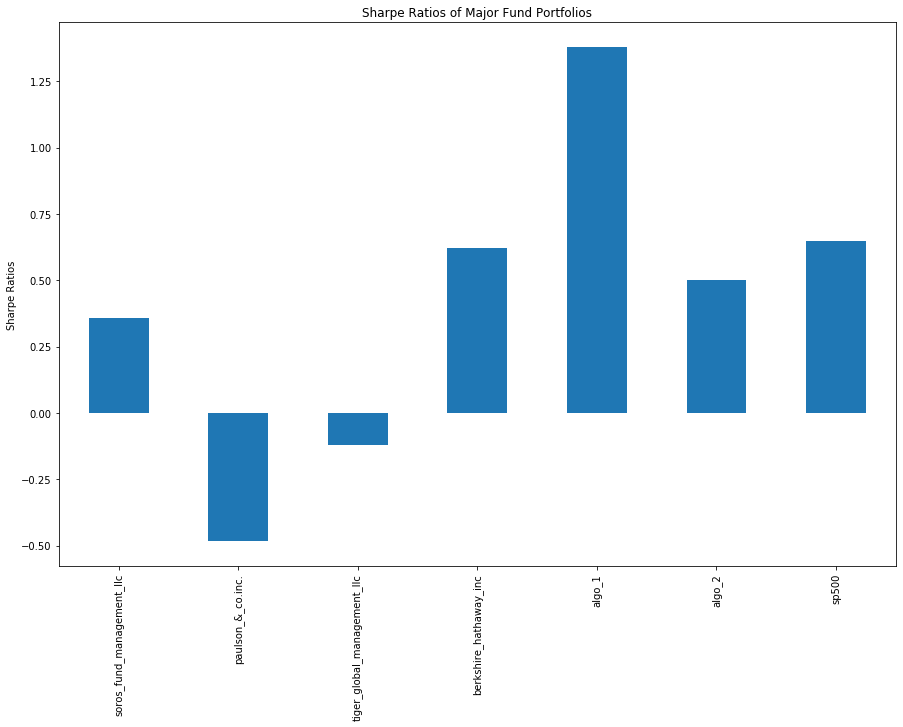

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_plot_obj = sharpe_ratios.plot(kind="bar", figsize=(15, 10), title="Sharpe Ratios of Major Fund Portfolios")
sharpe_plot_obj.set_ylabel('Sharpe Ratios')

<br>
<br>
<br>

**According to the Sharpe ratios data, the Algo 1 has a better risk to reward profile than all the other portfolios including the S&P500. Berkshire Hathaway portfolio on the other hand, has a better risk-reward than the other portfolios but not the market. The least favorable portoflio is Paulson & Co.**

<br>
<br>
<br>

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

Text(0, 0.5, 'beta')

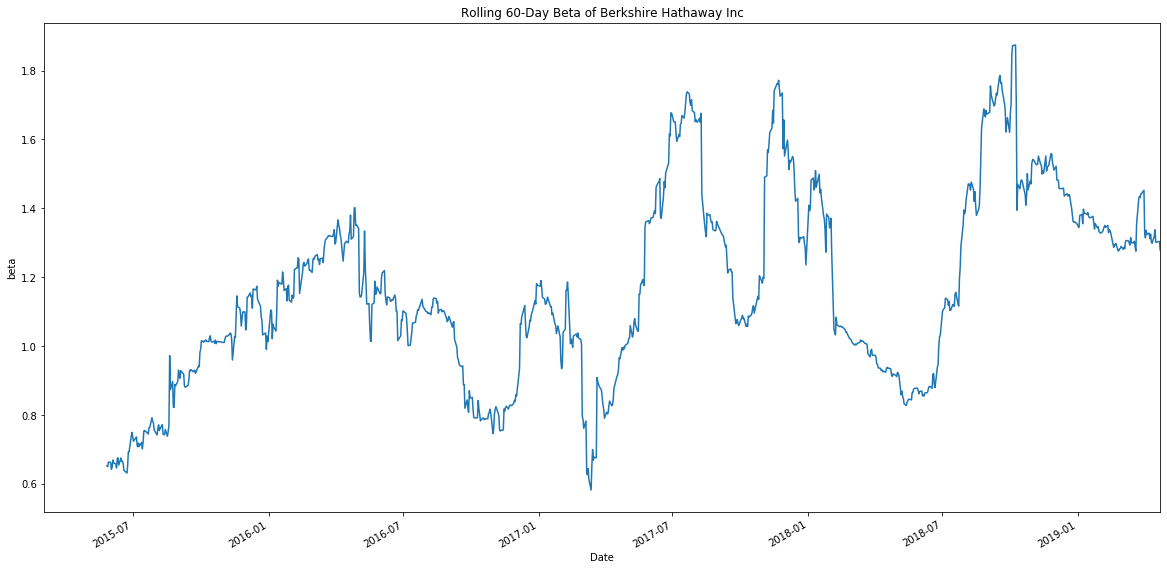

In [28]:
# beta for Berkshire Hathaway Inc
bh_covariance = all_daily_returns['berkshire_hathaway_inc'].rolling(window=60).cov(all_daily_returns['sp500'])
snp_variance = all_daily_returns['sp500'].rolling(window=60).var()
bh_beta = bh_covariance / snp_variance
bh_beta_obj = bh_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Berkshire Hathaway Inc')
bh_beta_obj.set_ylabel('beta')

In [29]:
# Average value of the 60-day rolling beta for Berkshire Hathaway
bh_beta.mean()

1.159061364343643

Text(0, 0.5, 'beta')

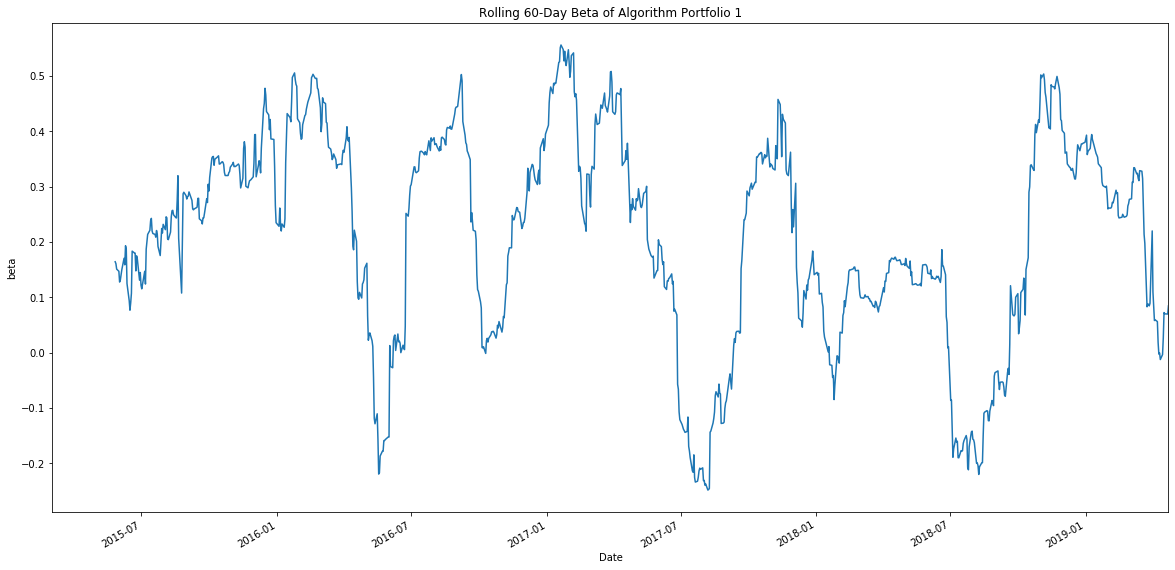

In [30]:
# Rolling beta for Algorithm portfolio 1 
a1_covariance = all_daily_returns['algo_1'].rolling(window=60).cov(all_daily_returns['sp500'])
a1_beta = a1_covariance / snp_variance
a1_beta_obj = a1_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algorithm Portfolio 1')
a1_beta_obj.set_ylabel('beta')

In [31]:
# Average value of the 60-day rolling beta for Algo 1
a1_beta.mean()

0.20715713505131475

<br>
<br>
<br>

**Berkishire Hathaway has a higher average beta so it would be more sensitive to the S&P500 movements. Algo 1 portfolio is the least sensitive to the S&P500 movements, it has the best risk to reward out of all the other portfolios. Based on the data alone, I would recommend Algo 1 for inclusion in the firm; however, before finalizing the decision I would advise more research about the portfolio**

<br>
<br>
<br>

---

# Portfolio Returns

In this section, I built a portfolio, calculated the returns, and compared the results to the market and the fund portfolios above.

1. Create your portfolio with equal weights and include it to the portfolios dataframe
2. Run performance calculations

## Choose three stocks and creating a DataFrame of the closing prices.

In [32]:
import pandas_datareader as web
from datetime import datetime

#select start date for correlation window as well as list of tickers
start = datetime(2015, 3, 2)
symbols_list = ['PFE', 'ILMN', 'AMZN']

# list to store prices
symbols=[]

# pull price using yahoo for each symbol in list defined above
for ticker in symbols_list:
    r = web.DataReader(ticker, 'yahoo', start)
    # add a symbol column
    r['Symbol'] = ticker
    symbols.append(r)
# concatenate into df
my_df = pd.concat(symbols)
my_df = my_df[['Close', 'Symbol']]
my_df_daily_returns = pd.pivot_table(my_df, values = 'Close', index=['Date'], columns = 'Symbol')
my_df_daily_returns.columns.name = None
my_df_daily_returns.columns = ['Amazon', 'Illumina Inc', 'Pfizer Inc']
my_df_daily_returns.head()

,Amazon,Illumina Inc,Pfizer Inc
Date,,,
2015-03-02,385.660004,194.059998,32.988613
2015-03-03,384.609985,196.029999,32.789375
2015-03-04,382.720001,192.679993,32.865276
2015-03-05,387.829987,200.130005,32.703983
2015-03-06,380.089996,193.139999,32.229603


In [33]:
portfolio_percent_change = my_df_daily_returns.pct_change()
portfolio_percent_change.head()

,Amazon,Illumina Inc,Pfizer Inc
Date,,,
2015-03-02,NaN,NaN,NaN
2015-03-03,-0.002723,0.010152,-0.006040
2015-03-04,-0.004914,-0.017089,0.002315
2015-03-05,0.013352,0.038665,-0.004908
2015-03-06,-0.019957,-0.034927,-0.014505


In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns = portfolio_percent_change.dot(weights)
portfolio_returns.head(15)

Date
2015-03-02         NaN
2015-03-03    0.000463
2015-03-04   -0.006563
2015-03-05    0.015703
2015-03-06   -0.023130
2015-03-09   -0.000874
2015-03-10   -0.010331
2015-03-11   -0.009284
2015-03-12    0.007096
2015-03-13   -0.003083
2015-03-16    0.021877
2015-03-17   -0.007652
2015-03-18    0.005946
2015-03-19    0.004146
2015-03-20   -0.000658
dtype: float64

In [35]:
# Concatenate my portfolio to the rest of the portfolio Dataframe. Using an inner join to avoid NaN cells.
all_daily_returns_unordered= pd.concat([all_daily_returns, portfolio_returns], axis="columns", join="inner")
all_daily_returns_unordered.rename(columns={
    0:'My Portfolio', 'soros_fund_management_llc': 'Soros Fund Management LLC', 'paulson_&_co.inc.': 'Paulson & Co INC', 
    'tiger_global_management_llc': 'Tiger Global Management LLC', 'berkshire_hathaway_inc':'Berkshire Hathaway INC', 
    'algo_1':'Algo 1', 'algo_2': 'Algo 2', 'sp500': 'SP500'
}, inplace = True)

portfolios_daily_returns_snp500 = all_daily_returns_unordered[['Soros Fund Management LLC', 'Paulson & Co INC', 'Tiger Global Management LLC', 
                                                 'Berkshire Hathaway INC', 'Algo 1', 'Algo 2', 'My Portfolio', 'SP500'
                                                ]]

portfolios_daily_returns = portfolios_daily_returns_snp500.drop('SP500', axis=1)
portfolios_daily_returns.head()

,Soros Fund Management LLC,Paulson & Co INC,Tiger Global Management LLC,Berkshire Hathaway INC,Algo 1,Algo 2,My Portfolio
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.000463
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.006563
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.015703
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.023130
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.000874


In [36]:
# My portfolio vs the S&P500
portfolio_snp500 = pd.concat([portfolio_returns, sp500_daily_returns], axis="columns")
portfolio_snp_daily_returns = portfolio_snp500.rename(columns={0:'My Portfolio', 'Close': 'S&P500'}).dropna()
portfolio_snp_daily_returns.head()

,My Portfolio,SP500
Date,,
2015-03-03,0.000463,-0.004539
2015-03-04,-0.006563,-0.004389
2015-03-05,0.015703,0.001196
2015-03-06,-0.023130,-0.014174
2015-03-09,-0.000874,0.003944


## Performance

Text(0, 0.5, 'Daily Returns')

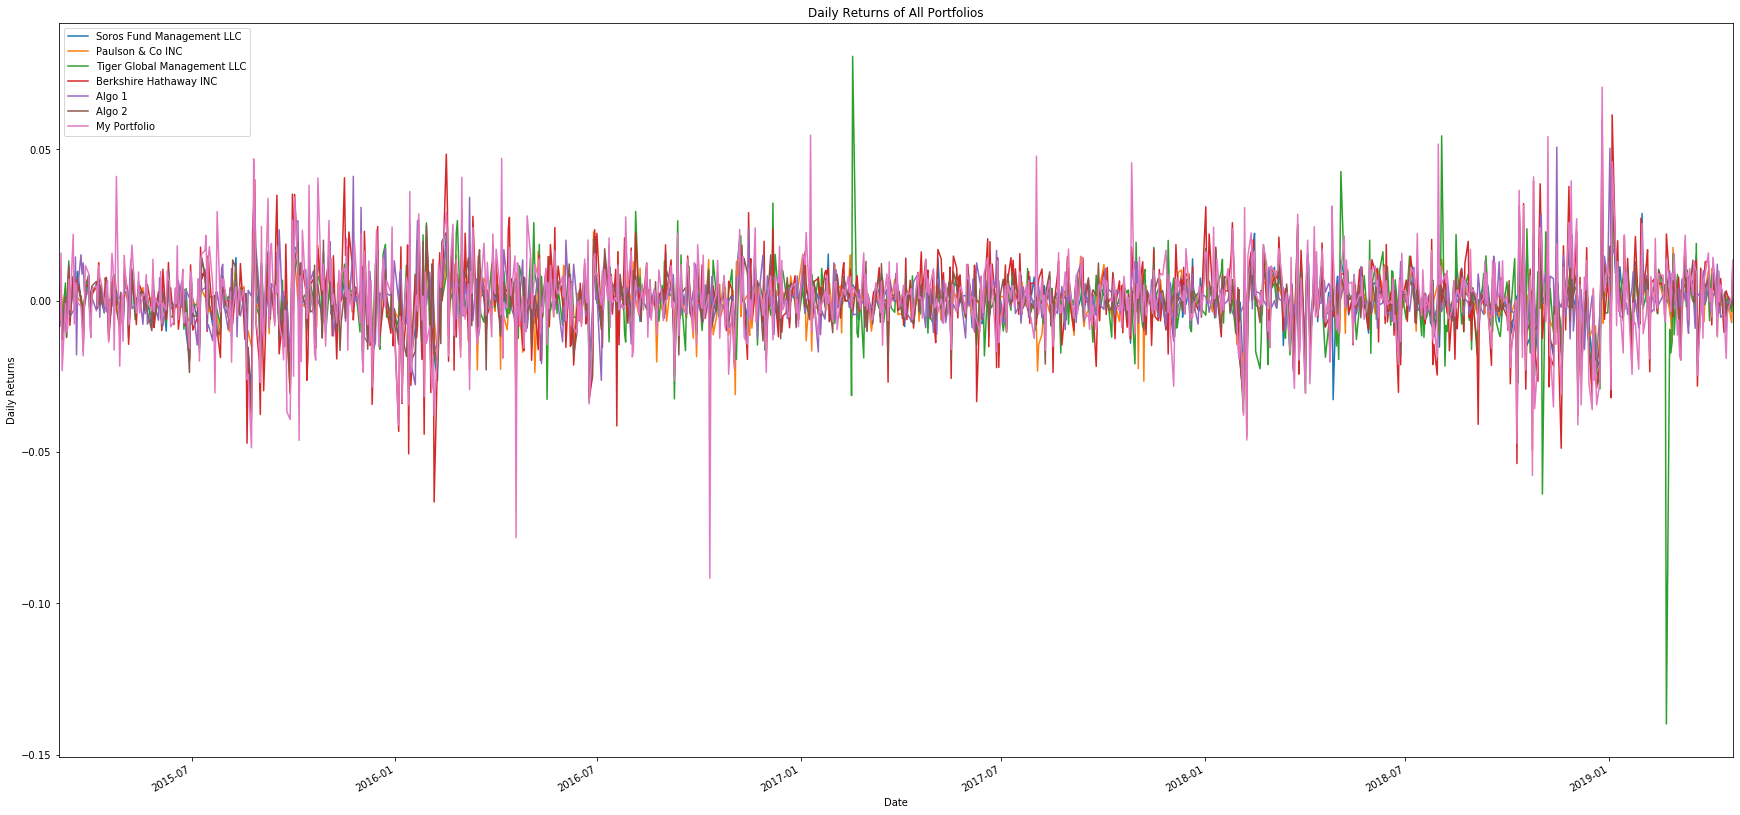

In [37]:
# My portfolio against all the other portfolios
portfolios_daily_returns_obj = portfolios_daily_returns.plot(figsize=(30, 15), title='Daily Returns of All Portfolios')
portfolios_daily_returns_obj.set_ylabel('Daily Returns')

Text(0, 0.5, 'Daily Returns')

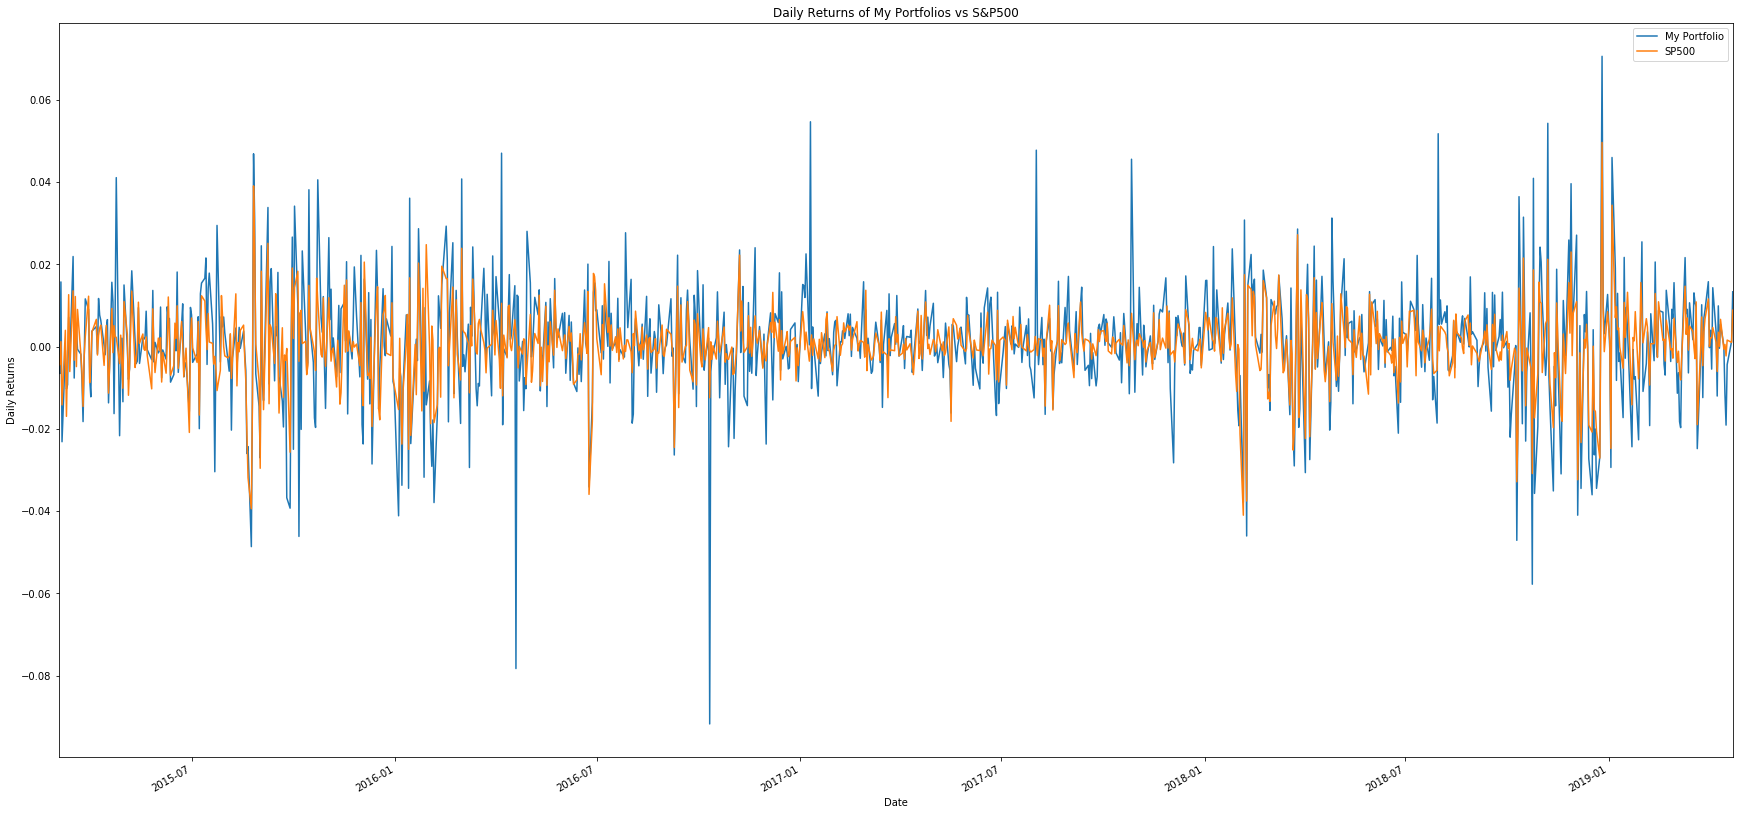

In [38]:
# my portfolio against SP500
portfolio_snp_obj = portfolio_snp_daily_returns.plot(figsize=(30, 15), title='Daily Returns of My Portfolios vs S&P500')
portfolio_snp_obj.set_ylabel('Daily Returns')

Text(0, 0.5, 'Box Plot of Daily Returns')

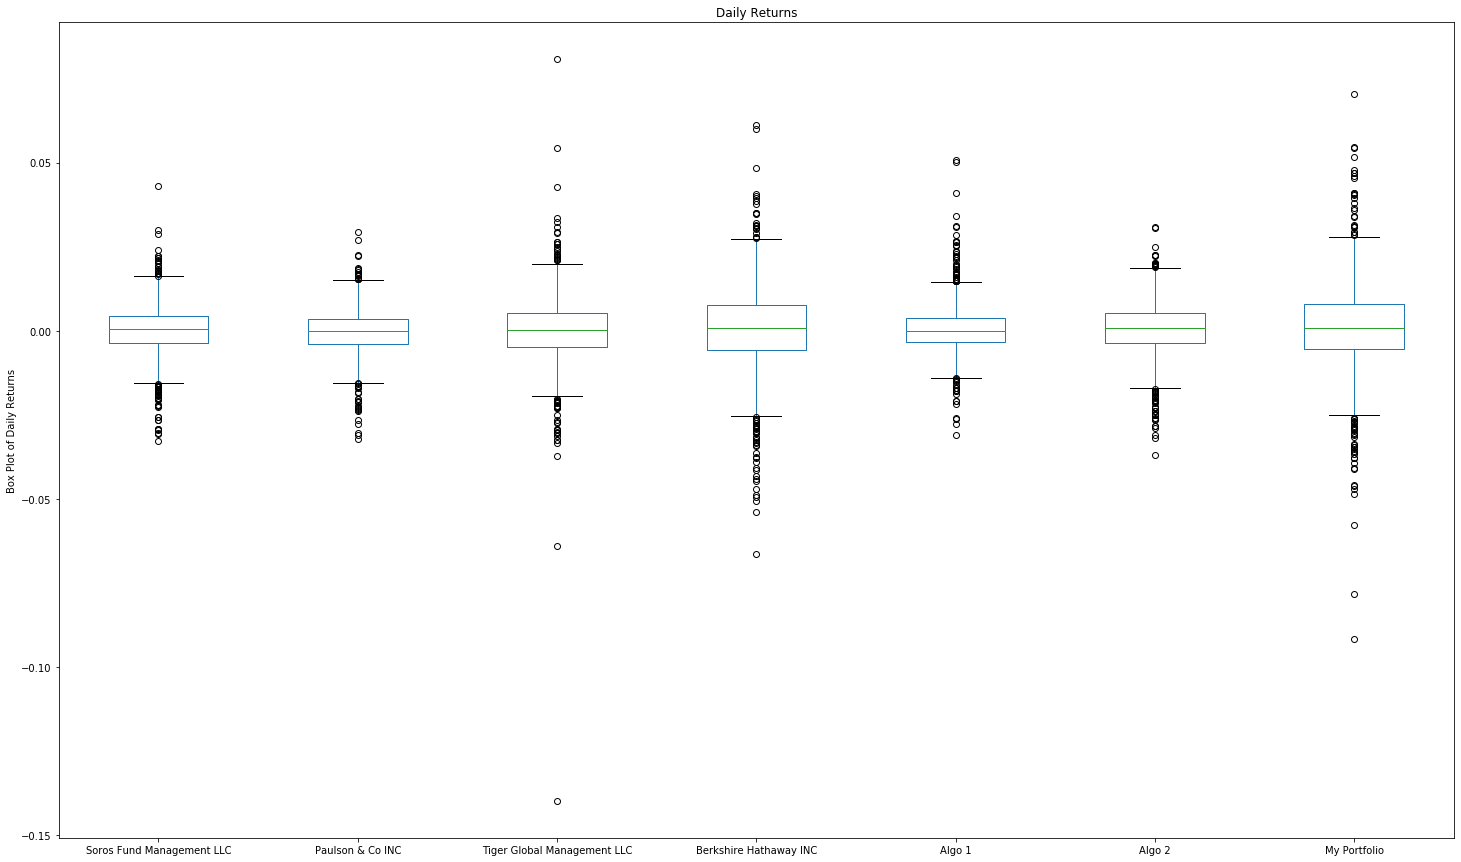

In [39]:
# Box plot to show volatility
portfolios_boxplot_obj = portfolios_daily_returns.plot.box(figsize=(25, 15), title='Daily Returns')
portfolios_boxplot_obj.set_ylabel('Box Plot of Daily Returns')

Text(0, 0.5, 'Cumulative Returns')

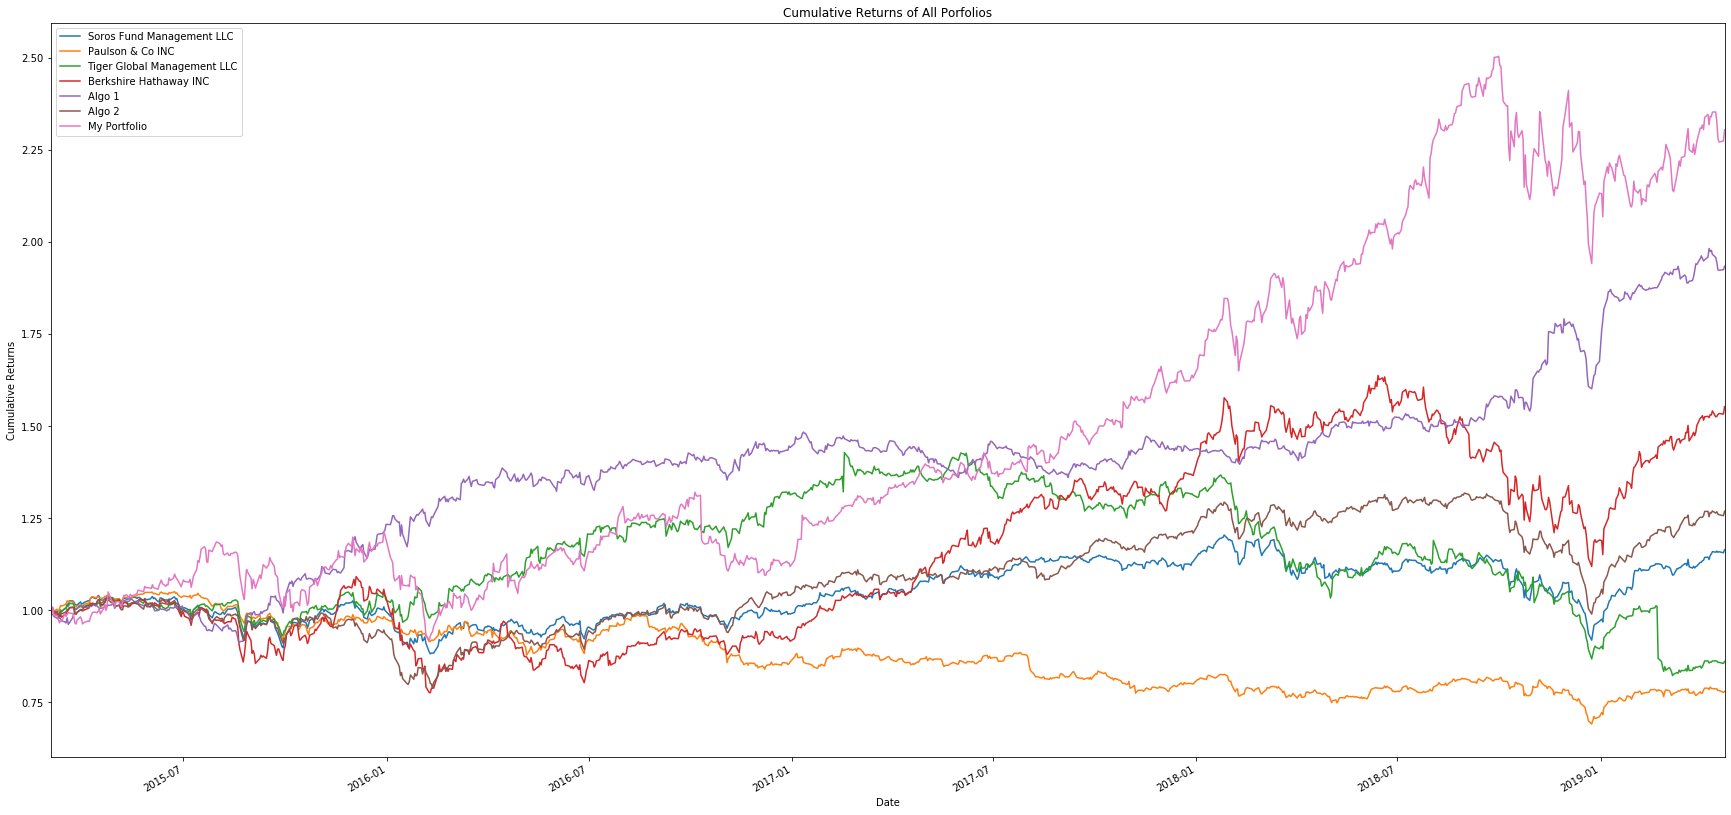

In [40]:
# plot cumulative return of all portfolios
all_cumulative_returns = (1 + portfolios_daily_returns).cumprod() 
all_cumulative_returns_obj = all_cumulative_returns.plot(figsize=(30, 15), title='Cumulative Returns of All Porfolios')
all_cumulative_returns_obj.set_ylabel('Cumulative Returns')

Text(0, 0.5, 'Cumulative Returns')

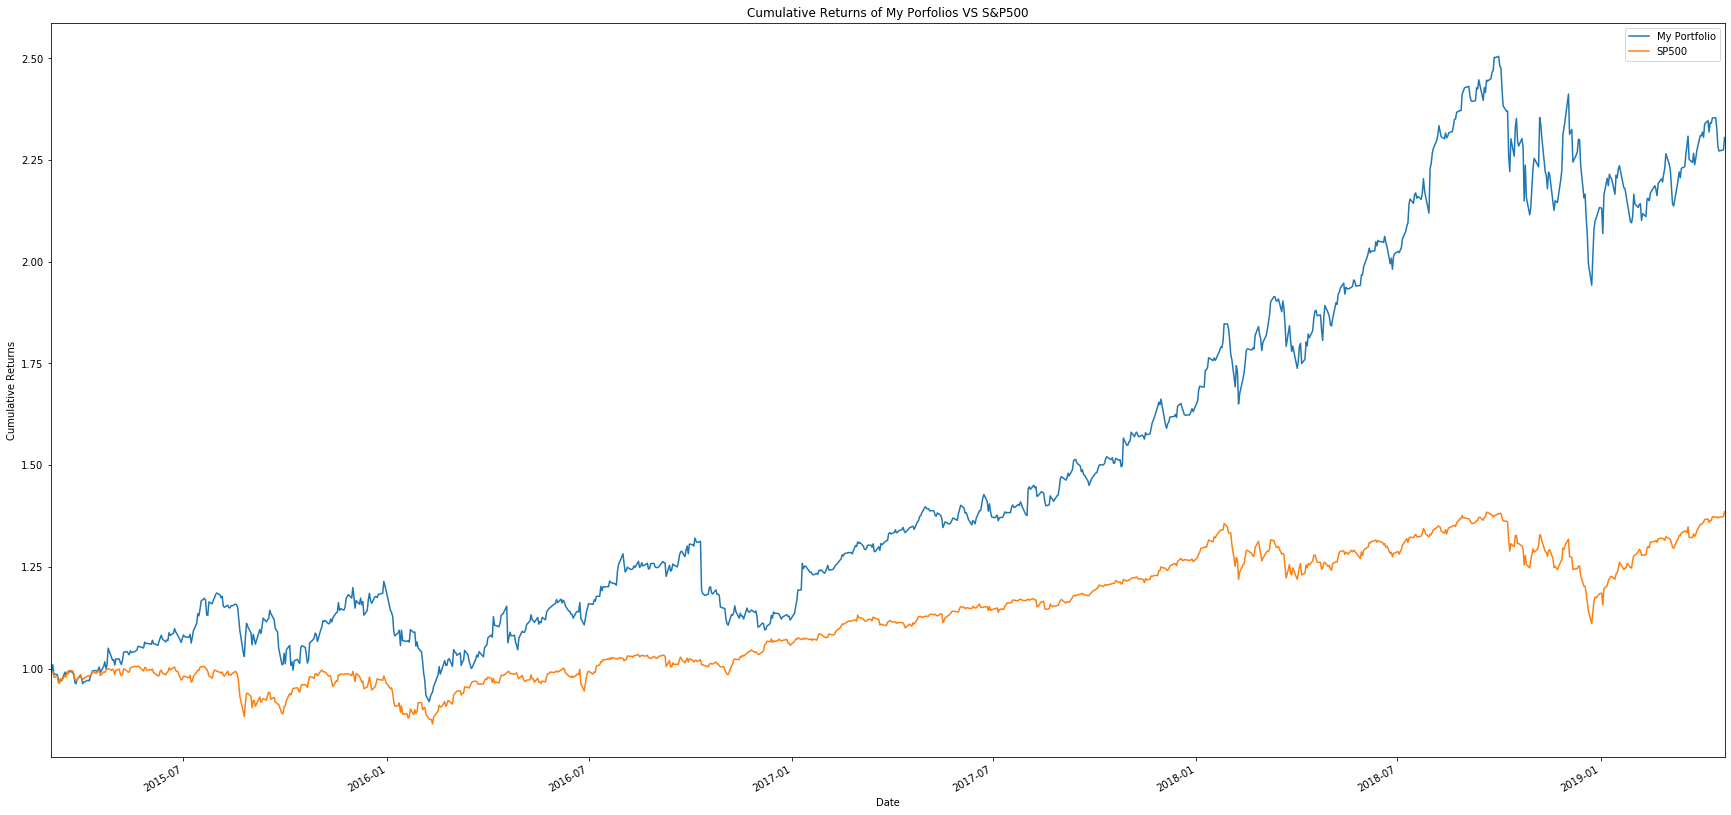

In [41]:
# plot cumulative return of my portfolio against the S&P500
snp_cumulative_returns = (1 + portfolio_snp_daily_returns).cumprod() 
snp_cumulative_returns_obj = snp_cumulative_returns.plot(figsize=(30, 15), title='Cumulative Returns of My Porfolios VS S&P500')
snp_cumulative_returns_obj.set_ylabel('Cumulative Returns')

## Risk

In [42]:
#Standard Deviation 
all_daily_returns_std = portfolios_daily_returns_snp500.std()
all_daily_returns_std.sort_values()

Paulson & Co INC               0.007023
Algo 1                         0.007620
Soros Fund Management LLC      0.007895
Algo 2                         0.008342
SP500                          0.008554
Tiger Global Management LLC    0.010894
Berkshire Hathaway INC         0.012919
My Portfolio                   0.013916
dtype: float64

In [43]:
# annualized standard deviation (252 trading days)
all_annualized_std = all_daily_returns_std * np.sqrt(252)
all_annualized_std.sort_values()

Paulson & Co INC               0.111488
Algo 1                         0.120967
Soros Fund Management LLC      0.125335
Algo 2                         0.132430
SP500                          0.135786
Tiger Global Management LLC    0.172936
Berkshire Hathaway INC         0.205077
My Portfolio                   0.220908
dtype: float64

## Rolling

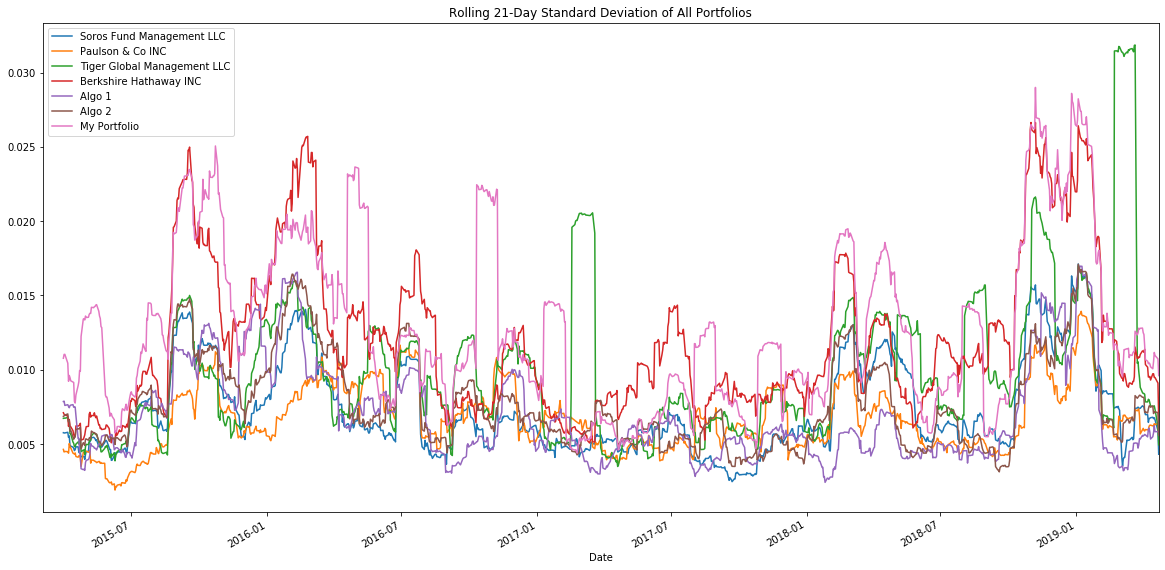

In [44]:
Rolling= portfolios_daily_returns.rolling(window=21).std().plot(figsize=(20, 10), title='Rolling 21-Day Standard Deviation of All Portfolios')
Rolling

## Beta

Text(0, 0.5, 'beta')

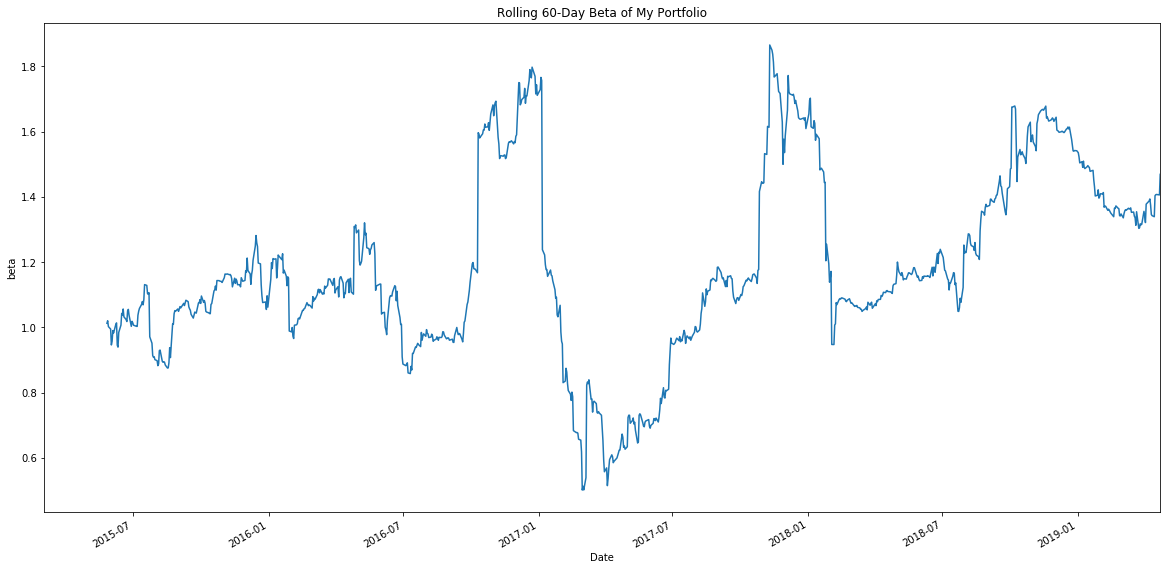

In [45]:
# Beta for my portfolio compared to the S&P 500.
mp_covariance = portfolio_snp_daily_returns['My Portfolio'].rolling(window=60).cov(portfolio_snp_daily_returns['SP500'])
mp_beta = mp_covariance / snp_variance
mp_beta_obj = mp_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')
mp_beta_obj.set_ylabel('beta')

In [46]:
# Plot average beta of my portfolio for 60 rolling window
mp_beta.mean()

1.1798451544691724

## Sharpe Ratios

In [47]:
# Annualzied Sharpe Ratios
my_sharpe_ratios = (portfolios_daily_returns_snp500.mean() * 252) / (portfolios_daily_returns_snp500.std() * np.sqrt(252))
my_sharpe_ratios.sort_values()

Paulson & Co INC              -0.483570
Tiger Global Management LLC   -0.121060
Soros Fund Management LLC      0.356417
Algo 2                         0.501364
Berkshire Hathaway INC         0.621810
SP500                          0.648267
My Portfolio                   1.024549
Algo 1                         1.378648
dtype: float64

Text(0, 0.5, 'Sharpe Ratios')

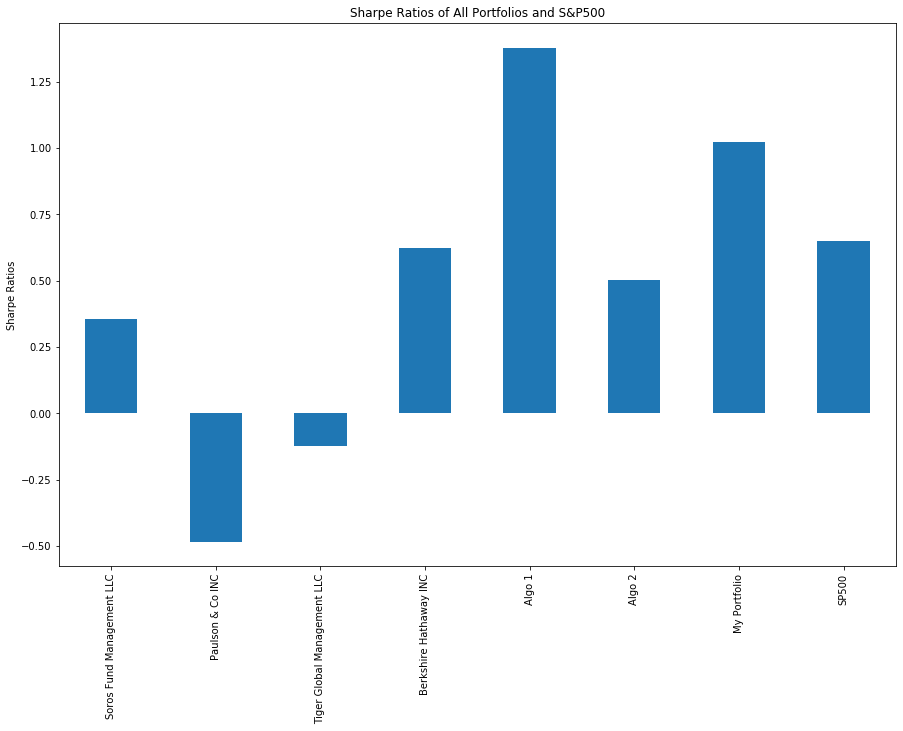

In [48]:
# Visualize the sharpe ratios as a bar plot
my_sharp_ratio_obj = my_sharpe_ratios.plot(kind="bar", figsize=(15, 10), title="Sharpe Ratios of All Portfolios and S&P500")
my_sharp_ratio_obj.set_ylabel('Sharpe Ratios')

## Include correlation analysis to determine which stocks (if any) are correlated

In [49]:
my_correlation = portfolios_daily_returns_snp500.corr(method ='pearson')
my_correlation

,Soros Fund Management LLC,Paulson & Co INC,Tiger Global Management LLC,Berkshire Hathaway INC,Algo 1,Algo 2,My Portfolio,SP500
Soros Fund Management LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.648114,0.837864
Paulson & Co INC,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.559491,0.669732
Tiger Global Management LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.424629,0.623946
Berkshire Hathaway INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.674550,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.266080,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.629059,0.858764
My Portfolio,0.648114,0.559491,0.424629,0.674550,0.266080,0.629059,1.000000,0.738561
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,0.738561,1.000000
